In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split

def loadData():
    #df = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/train_redux.csv')
    #y = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/y.csv', sep=';', usecols=[1])
    df = pd.read_csv('E:\\Downloads\\train_concat_95_00001.csv')
    y = pd.read_csv('E:\\Downloads\\y.csv', sep=';', usecols=[1])
    print("Datas loaded")
    return df, y

df, y = loadData()
print(df.shape)

Datas loaded
(26500, 6279)


In [58]:
from sklearn.ensemble import IsolationForest

def buildforest(train, y):
    forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)
    forest.fit(train, y)
    return forest

%time iforest = buildforest(df, y)

Wall time: 7min 42s


In [59]:
#outlier = iforest.predict(df)
anomaly_score = iforest.decision_function(df)
#anomaly_score[0]
df['score'] = anomaly_score

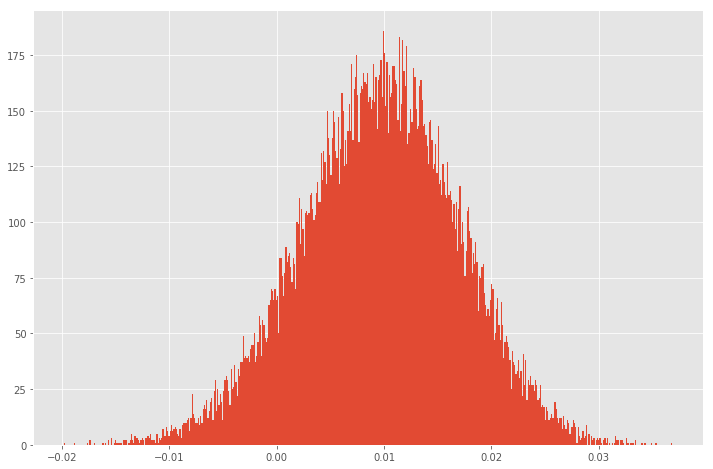

In [60]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.hist(anomaly_score, bins=500);

In [61]:
rowtodrop = []
counter =0
for n in range(len(df)):
    if (df['score'][n] < -0.02):
        counter= counter+1
        rowtodrop.append(n)
        print(n, df['score'][n])
print (counter)
print(rowtodrop)
todrop = pd.DataFrame(rowtodrop)
todrop.to_csv('E:\\Downloads\\outliers.csv', index=False)

0
[]


AttributeError: 'list' object has no attribute 'to_csv'

In [ ]:
#test sur doublons
from collections import Counter

mylist = df.values
[k for k,v in Counter(mylist).items() if v>1]